In [ ]:
import pickle
import pandas as pd
db_avital = pd.read_pickle("/dsi/sbm/singleCellDF.pkl")
db_sarit = pd.read_csv("/dsi/sbm/linoym/oracle_cloud/Sarit_CDR3_database.csv")

In [2]:
db_avital

,barcode_unique,cdr3_nt,chain,cdr3
0,-9223367852511077810,TGTGCAATGAGAGAGGCTTCTGGGGGTTACCAGAAAGTTACCTTT,TRA,CAMREASGGYQKVTF
1,-9223367852511077810,TGTGCTAGTGGTTTGCCTACCGGGACTAGCGGGAAATTTGGCACAG...,TRB,CASGLPTGTSGKFGTDTQYF
2,-9223367852511077810,TGTGCTGTAACTAATTTT,TRA,CAVTNF
3,-9223364613849612734,TGTGCTGTCCTGTATTCAGGAGGAGGTGCTGACGGACTCACCTTT,TRA,CAVLYSGGGADGLTF
4,-9223364613849612734,TGTGCCAGCAGCCCCCCGGGGGGAGGCTATGGCTACACCTTC,TRB,CASSPPGGGYGYTF
...,...,...,...,...
4091954,9223326476743424409,TGTGCCAGCAGTTACGGGGGGGGTCAGGCTCAGGGAAACACCATAT...,TRB,CASSYGGGQAQGNTIYF
4091955,9223340904742874031,TGTGCCAGCCTAATTAGCGGGGGAGGAAATGAGCAGTTCTTC,TRB,CASLISGGGNEQFF
4091956,9223340904742874031,TGCCTCGTGGGTGGCCCCAGAGGCTCAACCCTGGGGAGGCTATACTTT,TRA,CLVGGPRGSTLGRLYF
4091957,9223359695890863520,TGTGCCAGCAGCTCCCGGGACAGGGGGAAAACAGAGACCCAGTACTTC,TRB,CASSSRDRGKTETQYF


In [4]:
# List of CDR3 sequences to search
search_cdr3 = ['CALSDFFF', 'CVLFFFFF', 'CASGLFFF', 'CALSDLFF', 'CASSCLSF', 'CATRSLFF']

# Find rows where 'cdr3' contains or equals any of the strings in search_cdr3 and add the matched substring
matching_rows = db_avital[db_avital['cdr3'].apply(lambda x: any(substring in x for substring in search_cdr3))].copy()

# Add a column for the matched substring
matching_rows['matched_substring'] = matching_rows['cdr3'].apply(
    lambda x: next((substring for substring in search_cdr3 if substring in x), None)
)

# Print the matching rows with the matched substring
print(matching_rows)

              barcode_unique  \
3156768  4999380199246441706   
3297412  5629879266324229207   
4083747  9186694771332488963   

                                                   cdr3_nt chain  \
3156768      TGTGCTCTGAGTGACCTTTTTTTTGGAAATGAGAAATTAACCTTT   TRA   
3297412      TGTGCTCTGAGTGACCTTTTTTTTGGAAATGAGAAATTAACCTTT   TRA   
4083747  TGTGCTCTGAGTGATCTTTTTTTCACGGGAGGAGGAAACAAACTCA...   TRA   

                      cdr3 matched_substring  
3156768    CALSDLFFGNEKLTF          CALSDLFF  
3297412    CALSDLFFGNEKLTF          CALSDLFF  
4083747  CALSDLFFTGGGNKLTF          CALSDLFF  


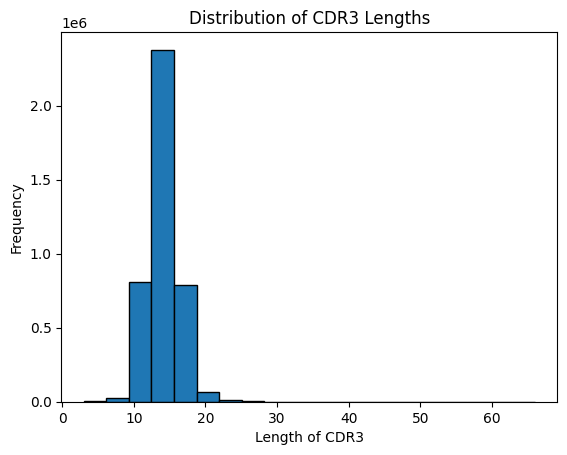

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
db_avital['cdr3_len'] = db_avital['cdr3'].apply(len)

# Plotting the distribution of CDR3 length
plt.hist(db_avital['cdr3_len'], bins=20, edgecolor='black')
plt.title('Distribution of CDR3 Lengths')
plt.xlabel('Length of CDR3')
plt.ylabel('Frequency')
plt.show()

In [7]:
db_sarit.head

<bound method NDFrame.head of                  SampleName Locus         aaSeqCDR3  \
0          D29_100_TCRG.tsv  TCRG    CALWEEELGKKIKV   
1          D29_100_TCRG.tsv  TCRG  CALWEVSQELGKKIKV   
2          D29_100_TCRG.tsv  TCRG   CALWESWELGKKIKV   
3          D29_100_TCRG.tsv  TCRG  CALWEVDQELGKKIKV   
4          D29_100_TCRG.tsv  TCRG     CALWAKLGKKIKV   
...                     ...   ...               ...   
230080850        SRR6413684  beta       CTCSADSTLYF   
230080851        SRR6413684  beta     CASGGDWDYEQYF   
230080852        SRR6413684  beta    CASSLWTTNSDYTF   
230080853        SRR6413684  beta     CASLLGSSYEQYF   
230080854        SRR6413684  beta         CASSFLLFF   

                                                   nSeqCDR3 countSeq  \
0                TGTGCCTTGTGGGAGGAAGAGTTGGGCAAAAAAATCAAGGTA    40555   
1          TGTGCCTTGTGGGAGGTGTCACAAGAGTTGGGCAAAAAAATCAAGGTA    25859   
2             TGTGCCTTGTGGGAGTCGTGGGAGTTGGGCAAAAAAATCAAGGTA    11792   
3          TGTGCCTTGT

In [8]:
# Extract the CDR3 sequences from both DataFrames
cdr3_sarit = set(db_sarit['aaSeqCDR3'])
cdr3_avital = set(db_avital['cdr3'])

# Find the intersection of both sets (common sequences)
common_cdr3 = cdr3_sarit.intersection(cdr3_avital)

# Count the number of common CDR3 sequences
num_common_cdr3 = len(common_cdr3)

print(f"Number of common CDR3 sequences: {num_common_cdr3}")

Number of common CDR3 sequences: 678645


In [ ]:
import os
import pandas as pd
############################## Elihay Corona ##############################

search_cdr3 = ['CALSDFFF', 'CVLFFFFF', 'CASGLFFF', 'CALSDLFF', 'CASSCLSF', 'CATRSLFF']

EL_path = '/dsi/scratch/home/dsi/elihay/downsampled_files/train'
###EL_path = '/dsi/scratch/home/dsi/elihay/downsampled_files/test'
###EL_path = '/dsi/scratch/home/dsi/elihay/new_cov_data/all new files'

# Iterate through all .tsv files in the directory
for file_name in os.listdir(EL_path):
    if file_name.endswith('.tsv'):  # Process only .tsv files
        file_path = os.path.join(EL_path, file_name)
        try:
            # Read the TSV file into a pandas DataFrame
            df = pd.read_csv(file_path, sep='\t')
            
            # Check if 'amino_acid' column exists in the DataFrame
            if 'amino_acid' in df.columns:
                # Filter rows where 'amino_acid' column matches any value in search_cdr3
                matching_rows = df[df['amino_acid'].apply(lambda x: any(substring in x for substring in search_cdr3))]

                # If there are matches, print them along with the file name
                if not matching_rows.empty:
                    print(f"Matches found in file: {file_name}")
                    print(matching_rows)
                    print("-" * 50)
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")


Matches found in file: 03855000011758_TCRB.tsv
         amino_acid  templates
3814  CASGLFFFETQYF          1
--------------------------------------------------
Matches found in file: 03855000012909_TCRB.tsv
             amino_acid  templates
6323  CASGLFFFGGGGNEQFF          1
--------------------------------------------------
Matches found in file: 03855000011715_TCRB.tsv
            amino_acid  templates
24526  CASSCLSFALYEAFF          1
--------------------------------------------------
Matches found in file: Copy of 860011317_TCRB.tsv
                 amino_acid  templates
18473  CASSCLSFDPPCWQYNEQFF          1
--------------------------------------------------


In [8]:
import os
import pandas as pd

search_cdr3 = ['CALSDFFF', 'CVLFFFFF', 'CASGLFFF', 'CALSDLFF', 'CASSCLSF', 'CATRSLFF']
EL_path = '/dsi/scratch/home/dsi/elihay/downsampled_files/test'

# Iterate through all .tsv files in the directory
for file_name in os.listdir(EL_path):
    if file_name.endswith('.tsv'):  # Process only .tsv files
        file_path = os.path.join(EL_path, file_name)
        try:
            # Read the TSV file into a pandas DataFrame
            df = pd.read_csv(file_path, sep='\t')
            
            # Check if 'amino_acid' column exists in the DataFrame
            if 'amino_acid' in df.columns:
                # Filter rows where 'amino_acid' column matches any value in search_cdr3
                matching_rows = df[df['amino_acid'].apply(lambda x: any(substring in x for substring in search_cdr3))]

                # If there are matches, print them along with the file name
                if not matching_rows.empty:
                    print(f"Matches found in file: {file_name}")
                    print(matching_rows)
                    print("-" * 50)
        except Exception as e:
            print(f"Error processing file {file_name}: {e}")